# Import functions and load datasets

In [1]:
# Ensure notebook be able to call functions from utils.py
import torch  # Importing PyTorch for deep learning framework
import torchvision.transforms as transforms
from torchvision import transforms
import matplotlib.pyplot as plt
import sys
sys.path.append('/kaggle/input/get-ready-to-git-overpara')  # Add the directory to the system path

from utils import extract_clear_number, extract_noisy_number, load_images_and_filenames_from_directory, load_trained_overparametrization_model, plot_comparison_with_noisy, process_full_image, plot_training_outputs_with_psnr, plot_validation_outputs_with_psnr, plot_testing_outputs_with_psnr  # Now import the functions
from data import DatasetWithFilenames, load_and_preprocess_data

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:
# Key hyperparameters for visualisations
normalised_size = (70,70)
numLayers = 1
transform = transforms.Compose([
    transforms.ToTensor()
])

In [3]:
# Directory paths
clear_train_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_training_dataset'
clear_valid_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_validation_dataset'
noisy_train_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_training_dataset'
noisy_valid_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_validation_dataset'
noisy_test_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_test dataset'
clear_test_dir = '/kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_test_dataset'

# Load and preprocess data
noisy_train_images, clear_train_images, noisy_valid_images, clear_valid_images, \
noisy_train_filenames, clear_train_filenames, noisy_valid_filenames, clear_valid_filenames = load_and_preprocess_data(
    clear_train_dir, clear_valid_dir, noisy_train_dir, noisy_valid_dir)

# Load clear training images and generate filenames
clear_test_images, clear_test_filenames = load_images_and_filenames_from_directory(clear_test_dir, extract_clear_number, transform)
noisy_test_images, noisy_test_filenames = load_images_and_filenames_from_directory(noisy_test_dir, extract_noisy_number, transform)


Defining transformation...
Loading and preprocessing clear training images from /kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_training_dataset...
Finished loading clear training images.
Loading and preprocessing clear validation images from /kaggle/input/lista-0-1-split/Dataset_0.1_split/Normalised_validation_dataset...
Finished loading clear validation images.
Loading and preprocessing noisy training images from /kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_training_dataset...
Finished loading noisy training images.
Loading and preprocessing noisy validation images from /kaggle/input/lista-0-1-split/Dataset_0.1_split/Noisy_0.1_validation_dataset...
Finished loading noisy validation images.


In [4]:
# Convert ground truth and noisy images to NumPy arrays
X1, Y1 = clear_train_images.numpy(), noisy_train_images.numpy()
X2, Y2 = clear_valid_images.numpy(), noisy_valid_images.numpy()
X3, Y3 = clear_test_images.view(clear_test_images.size(0), -1).transpose(0, 1).numpy(), noisy_test_images.view(noisy_test_images.size(0), -1).transpose(0, 1).numpy()

# Convert the NumPy arrays to PyTorch tensors and reshape
X1_t, Y1_t = torch.from_numpy(X1.T).float().view(-1, 3, 70, 70).to(device), torch.from_numpy(Y1.T).float().view(-1, 3, 70, 70).to(device)
X2_t, Y2_t = torch.from_numpy(X2.T).float().view(-1, 3, 70, 70).to(device), torch.from_numpy(Y2.T).float().view(-1, 3, 70, 70).to(device)
X3_t, Y3_t = torch.from_numpy(X3.T).float().view(-1, 3, 70, 70).to(device), torch.from_numpy(Y3.T).float().view(-1, 3, 70, 70).to(device)

# Define the datasets
dataset_train = DatasetWithFilenames(X1_t, Y1_t, clear_train_filenames)
dataset_valid = DatasetWithFilenames(X2_t, Y2_t, clear_valid_filenames)
dataset_test = DatasetWithFilenames(X3_t, Y3_t, clear_test_filenames)

print('Datasets are properly loaded.')

Datasets are properly loaded.


# Import pre-trained model

In [5]:
# Load the trained model
model_path = r'/kaggle/input/trained_overpara_model_0.1/pytorch/default/1/trained_overparametrization_model.pth'
loaded_net = load_trained_overparametrization_model(model_path)


/kaggle/input/get-ready-to-git-overpara/utils.py:869: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Model loaded successfully.


# Sample visualisation from train dataset

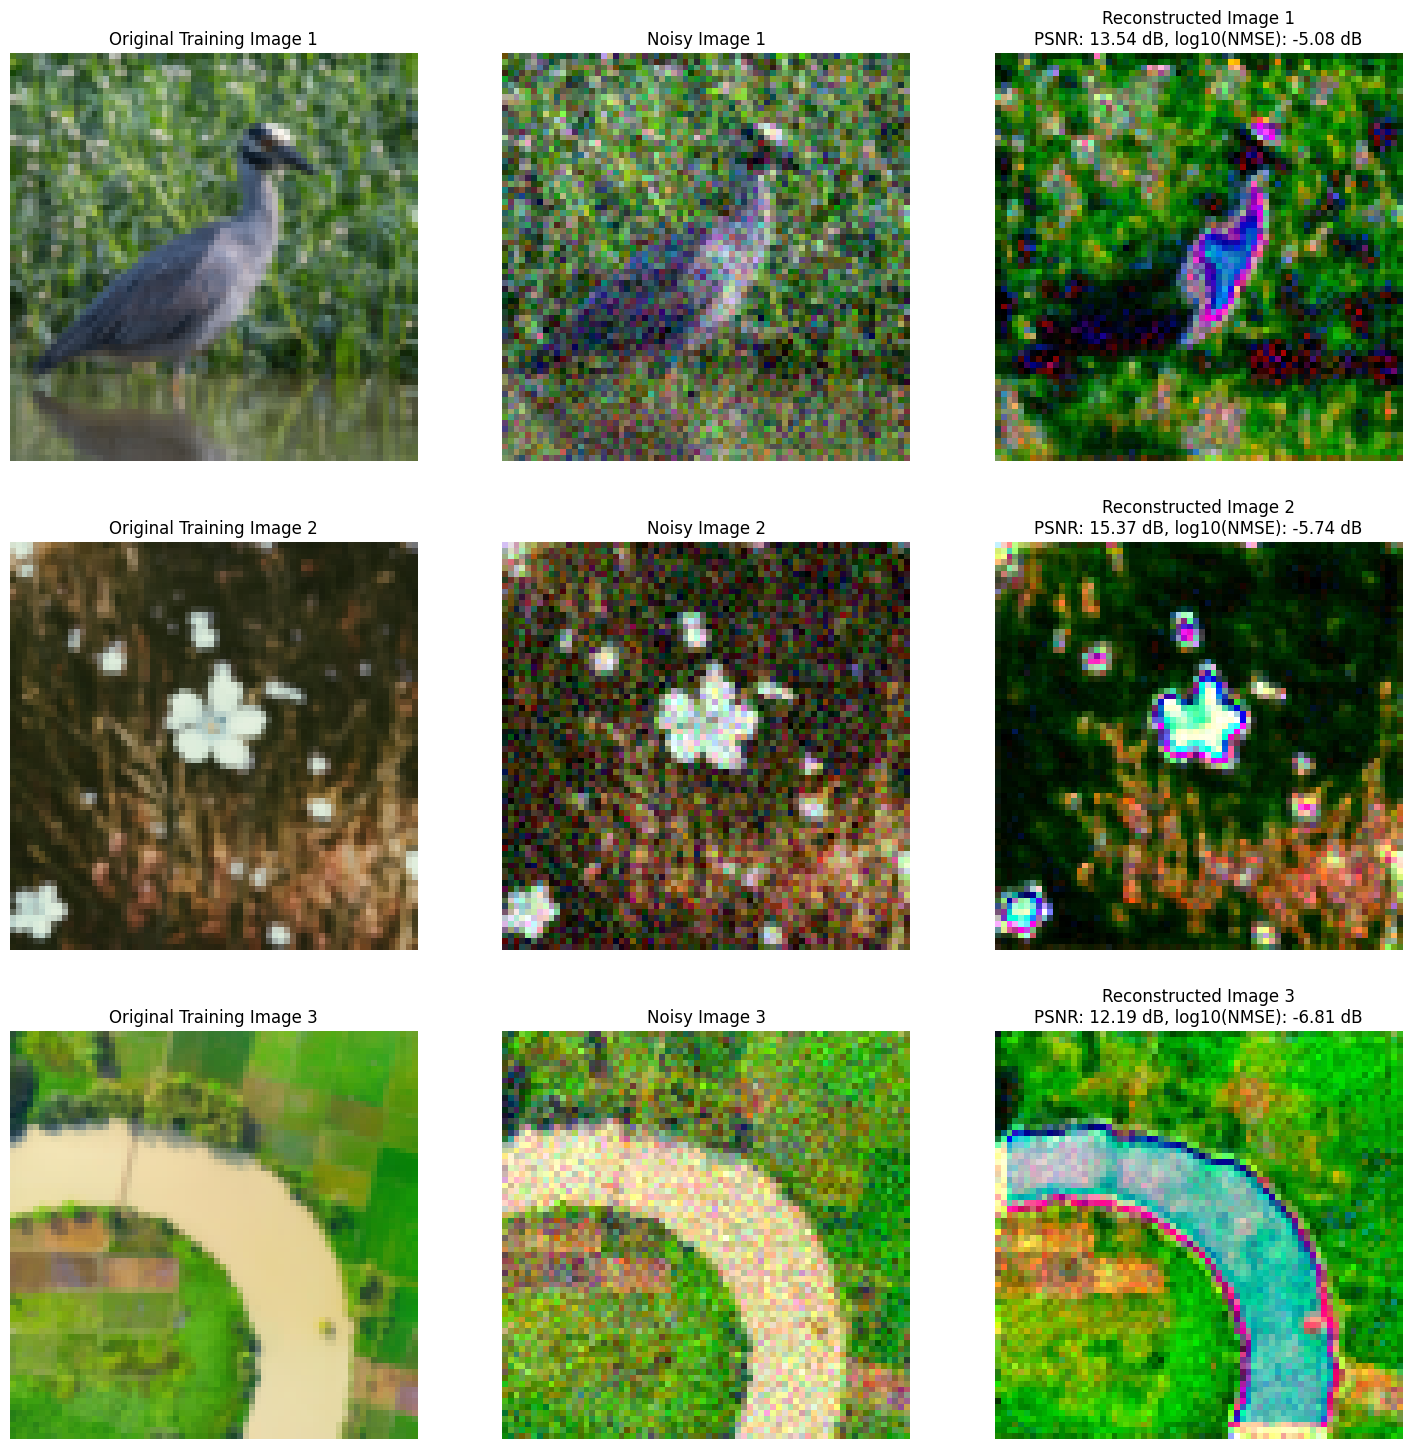

In [6]:
plot_training_outputs_with_psnr(dataset_train, loaded_net, numLayers, device, noisy_train_dir, normalised_size)

# Sample visualisation from validation dataset

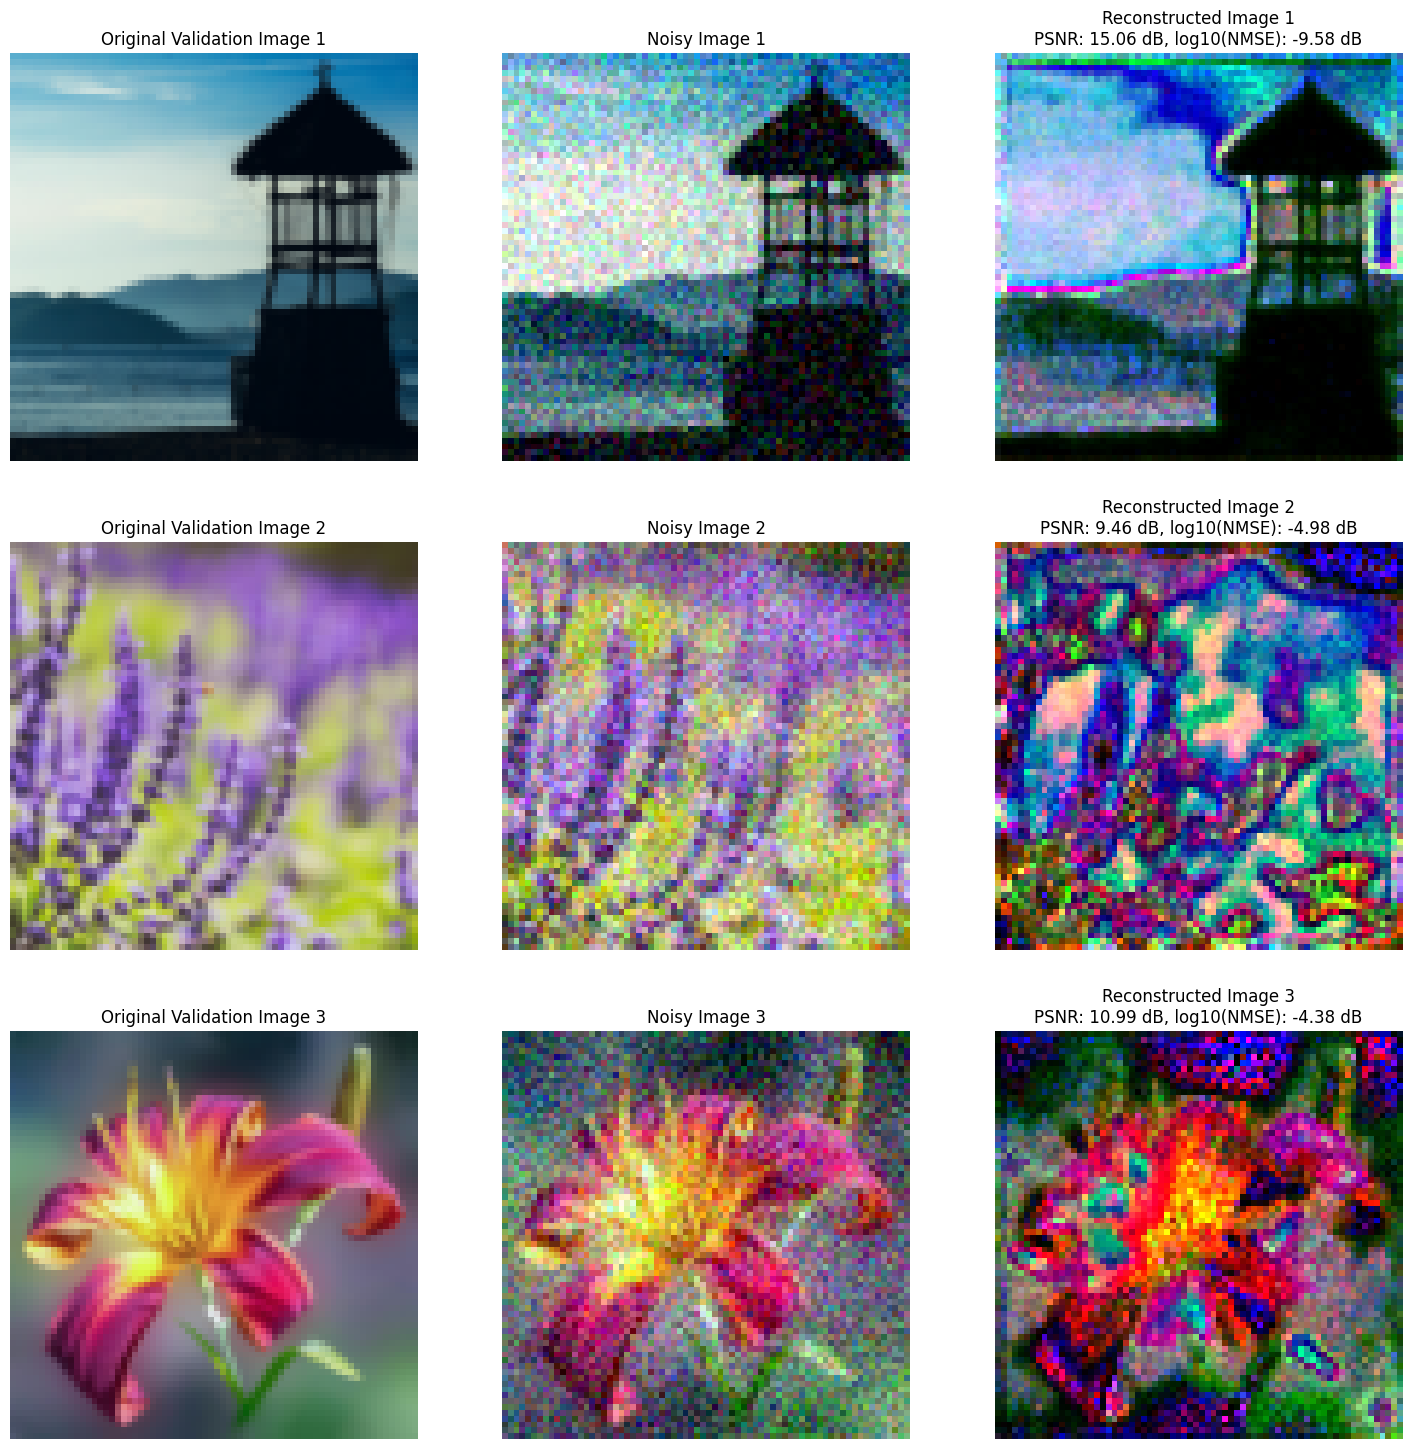

In [7]:
plot_validation_outputs_with_psnr(dataset_valid, loaded_net, numLayers, device, noisy_valid_dir, normalised_size)

# Sample visualisation from test dataset

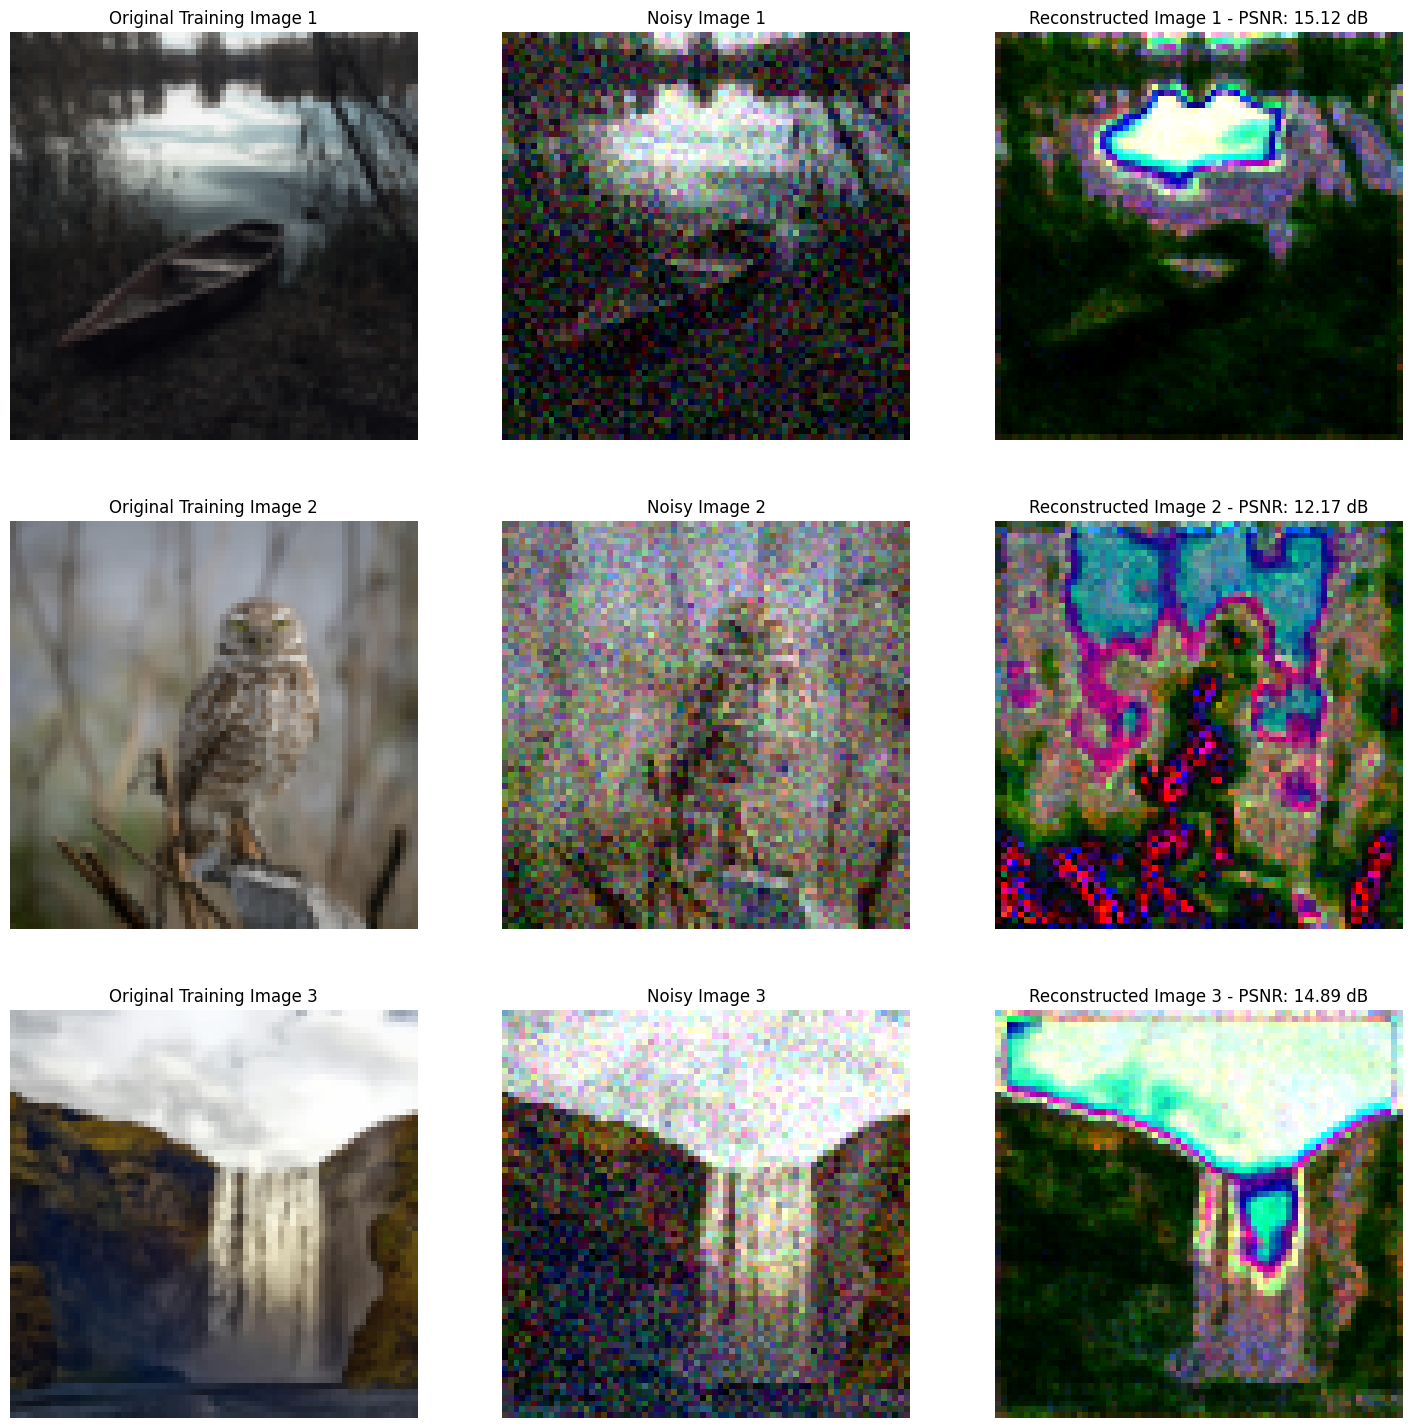

In [8]:
plot_testing_outputs_with_psnr(dataset_test, loaded_net, numLayers, device, noisy_test_dir, normalised_size)